In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("wine_data.csv",header=None,usecols=[0,1,2])
df.columns=["Class label","Alcohol","Malic acid"]

In [25]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

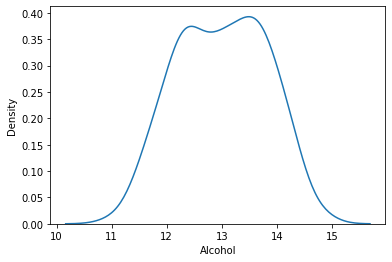

In [12]:
sns.kdeplot(df["Alcohol"]) #displot #pdf

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

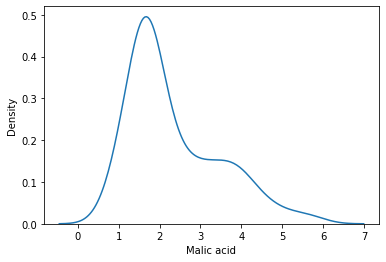

In [13]:
sns.kdeplot(df["Malic acid"])

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

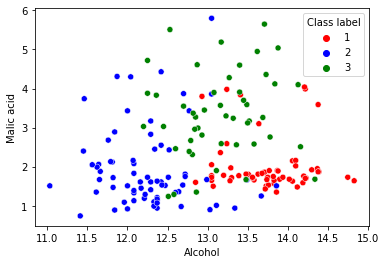

In [21]:
color_dict={1:'red', 2:'blue', 3:'green'}

sns.scatterplot(df["Alcohol"], df["Malic acid"],hue=df["Class label"], palette=color_dict)


In [28]:
X=df.drop(columns='Class label',axis=1)
y=df['Class label']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()

In [37]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [41]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [44]:
round(X_train.describe(),2)

,Alcohol,Malic acid
count,124.00,124.00
mean,12.98,2.38
std,0.80,1.14
min,11.03,0.89
25%,12.36,1.61
50%,13.04,1.88
75%,13.64,3.25
max,14.75,5.65


In [45]:
round(X_train_scaled.describe(),2)

,Alcohol,Malic acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


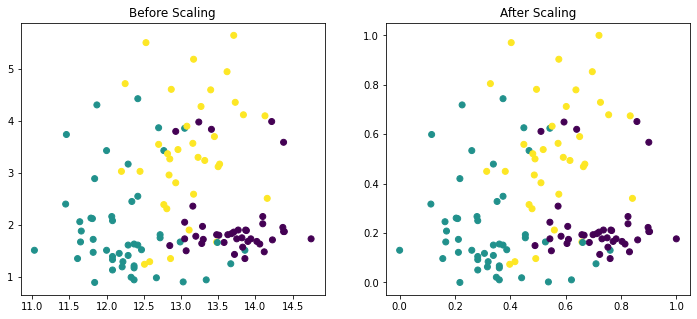

In [51]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Alcohol'] , X_train['Malic acid'], c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'] , X_train_scaled['Malic acid'], c=y_train)
ax2.set_title("After Scaling")
plt.show()

**Squishing of data is done into a unit rectangle. Representation remains same**

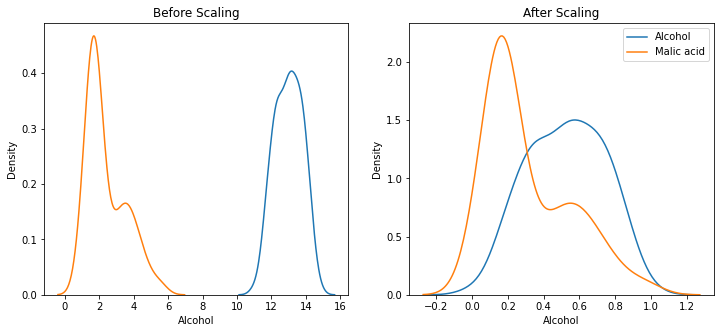

In [74]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)
ax1.set_title("Before Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.legend(labels=['Alcohol','Malic acid'])
ax2.set_title("After Scaling")
plt.show()

after scaling, both have came in same range. Curve is between 0 to 1

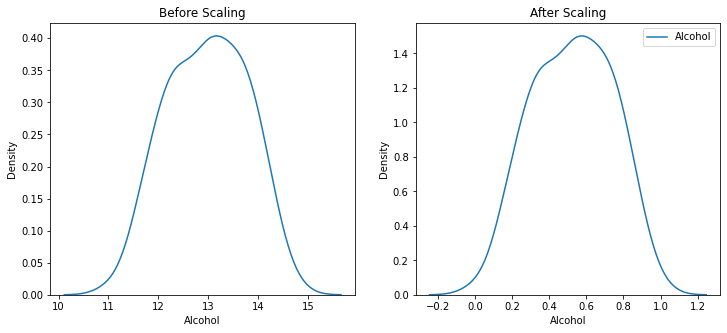

In [75]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.legend(labels=['Alcohol'])
ax1.set_title("Before Scaling")
ax2.set_title("After Scaling")
plt.show()

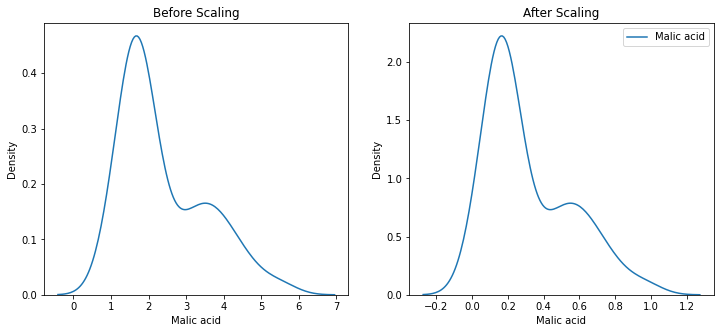

In [76]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(X_train['Malic acid'], ax=ax1)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.legend(labels=['Malic acid'])
ax1.set_title("Before Scaling")
ax2.set_title("After Scaling")
plt.show()

Its not necessary always the shape will stay same. If outlier present, outlier impact is squished which is not good